# 비디오 프레임 추출
## cv2 설치
`pip install opencv-contrib-python`

$\sum |I_1(i,j) - I_2(i+x,j+y) | $로 평가?

$ score =  \left( \sum_{i=x}^{(n-1)-x}  ( f(i+x)-f(i) )^2  \right) $ 최소로

$\frac {\partial score} {\partial x} =  0, \left(f(i+x)-f(i)\right)f'(i+x) = 0 $



In [72]:
import cv2
import numpy
import matplotlib.pyplot as plt
from random import randint

In [10]:
def FrameCapture(video):
    # the number of frame
    count = 0
    directory = "frame"
    
    # Path to video file 
    videoObject = cv2.VideoCapture(video) 
  
    print(videoObject.isOpened())
    # checks whether frames were extracted 
    success = 1
  
    while success: 
        # videoObject object calls read 
        success, image = videoObject.read() 

        if success != 1: break
        # Saves the frames 
        path = directory + '\\' + "frame%d.png" % count
        print(f"path:{path}")
        cv2.imwrite(path, image) 
  
        count += 1

In [11]:
FrameCapture('data\\video.MOV')

True
path:frame\frame0.png
path:frame\frame1.png
path:frame\frame2.png
path:frame\frame3.png
path:frame\frame4.png
path:frame\frame5.png
path:frame\frame6.png
path:frame\frame7.png
path:frame\frame8.png
path:frame\frame9.png
path:frame\frame10.png
path:frame\frame11.png
path:frame\frame12.png
path:frame\frame13.png
path:frame\frame14.png
path:frame\frame15.png
path:frame\frame16.png
path:frame\frame17.png
path:frame\frame18.png
path:frame\frame19.png
path:frame\frame20.png
path:frame\frame21.png
path:frame\frame22.png
path:frame\frame23.png
path:frame\frame24.png
path:frame\frame25.png
path:frame\frame26.png
path:frame\frame27.png
path:frame\frame28.png
path:frame\frame29.png
path:frame\frame30.png
path:frame\frame31.png
path:frame\frame32.png
path:frame\frame33.png
path:frame\frame34.png
path:frame\frame35.png
path:frame\frame36.png
path:frame\frame37.png
path:frame\frame38.png
path:frame\frame39.png
path:frame\frame40.png
path:frame\frame41.png
path:frame\frame42.png
path:frame\frame

## 이미지 들어간거 찾기
- [**Optical flow**](https://en.wikipedia.org/wiki/Optical_flow)라는 개념이 있으며, 얼마나 이미지가 변화하였는지를 나타냄
- 전체 이미지 비교 방법
- sub이미지로 나눠 비교하는 방법
- 특징점 추출방법
    - LMedS, RANSAC, SelMap [^1]


[^1] : [Zhaowei Li and David R. Selviah, Comparison of Image Alignment Algorithm, University College London](https://www.ee.ucl.ac.uk/lcs/previous/LCS2011/LCS1115.pdf)

In [2]:
i1 = cv2.imread("frame/frame0.png")
i2 = cv2.imread("frame/frame1.png")
i3 = cv2.imread("frame/frame2.png")
i4 = cv2.imread("frame/frame3.png")
i5 = cv2.imread("frame/frame4.png")
i6 = cv2.imread("frame/frame5.png")
i7 = cv2.imread("frame/frame6.png")

In [27]:
cv2.imshow("im1",i1)
cv2.imshow("im2",i5)
cv2.waitKey(0)

-1

In [43]:
cv2.destroyAllWindows()

In [ ]:
img = i1-i2
cv2.imshow("img",img)
cv2.waitKey(0)

In [130]:
cnt = 0

def getScore(i1,i2,xh, yh, w,h):
    t1 = i1[max(0,yh):h+min(0,yh) , max(0,xh):w+min(0,xh) ]
    t2 = i2[max(0,-yh):h-max(0,yh), max(0,-xh):w-max(0,xh)]
    # print(t1.shape, t2.shape)
    img = t1-t2

    # print('img',img.shape)
    
    return sum(sum(numpy.abs(img.astype('int8').astype('int32'))))
    # score[xh+xl,yh+yl] = sum(sum(sum(numpy.abs(img.astype('int8').astype('int32')))))
    # print(score)



def parallelMovement(i1,i2, r):
    global cnt

    px, py = 0 ,0 

    h, w, = i1.shape
    # h, w, _ = i1.shape
    xl = 4
    yl = 4

    xrange = range(-xl+px, xl+1+px)
    yrange = range(-yl+py, yl+1+py)

    score =  numpy.zeros((xl*2+1,yl*2+1),dtype=int)

    for xh in xrange:
        for yh in yrange:
            score[xh+xl,yh+yl] = getScore(i1,i2,xh,yh,w,h)
            
            


    score = score/ (w-xl)/(h-yl)
    # score = 1/(score*score)
    print(score.round(4))

    ## 시각화
    x,y = numpy.meshgrid(
        numpy.array(xrange),
        numpy.array(yrange)
    )

    # fig = plt.figure()
    # ax = fig.gca(projection='3d')
    # ax.plot_surface(x,y,score, cmap="BuPu")
    # plt.show()

    plt.grid(True)
    d = score.reshape((xl*2+1)*(yl*2+1))

    mylevels = numpy.linspace(min(d),max(d),15)
    # if min(d) < max(d):
    plt.subplot(r,r,cnt)
    ourplot = plt.contourf(x,y,score,levels=mylevels,) #cmap="coolwarm"

    sum_xy = lambda x,y : sum([(xh**x)*(yh**y) for xh in xrange for yh in yrange])
    view_xy = lambda x,y : sum([(xh**x)*(yh**y)*score[yh+yl, xh+xl] for xh in xrange for yh in yrange])

    # x,y = 0,0

    diff = [(2,0),(1,1),(0,2),(1,0),(0,1),(0,0)]

    A = numpy.array([[sum_xy(x+i,y+j) for x,y in diff] for i,j in diff])
    Y = numpy.array([[view_xy(x,y)] for x,y in diff])
    invA = numpy.linalg.inv(A)

    X = invA@Y
    a,b,c,d,e,f =  X.reshape(6)
    # -numpy.linalg.inv(numpy.array([[2*a,b],[b,2*c]]))@numpy.array([[d],[e]])
    minX, minY = -(b*e-2*c*d)/(b*b-4*a*c), -(b*d-2*a*e)/(b*b-4*a*c)
    return minX, minY


# numpy.array([[a*x*x + b*x*y + c*y*y + d*x + e*y + f for x in xrange] for y in yrange]).round(2)



In [ ]:
s = (score).reshape((xl*2+1)*(yl*2+1)).sum()
[
(x*score).reshape((xl*2+1)*(yl*2+1)).sum()/s,
(y*score).reshape((xl*2+1)*(yl*2+1)).sum()/s
]

[0.025734175781299724, 0.6276613915803442]

[[0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0.]]
(nan, nan) (100, 100) (100, 100) 3
[[0.1207 0.1141 0.1135 0.1139 0.1168 0.1139 0.1191 0.1211 0.1211]
 [0.1215 0.1178 0.1148 0.1133 0.1163 0.1152 0.12   0.123  0.12  ]
 [0.1211 0.1198 0.1191 0.1107 0.1141 0.1189 0.12   0.1226 0.1226]
 [0.1185 0.1183 0.122  0.1068 0.1076 0.1204 0.12   0.12   0.1235]
 [0.1182 0.1175 0.1229 0.1071 0.0954 0.1186 0.1186 0.1162 0.124 ]
 [0.1144 0.115  0.1215 0.1076 0.0775 0.1202 0.1185 0.1131 0.1252]
 [0.1076 0.105  0.1094 0.0933 0.0354 0.1003 0.1098 0.105  0.1189]
 [0.1161 0.1115 0.1187 0.1113 0.0697 0.1089 0.115  0.1089 0.1176]
 [0.116  0.1114 0.1206 0.1143 0.0923 0.1104 0.1206 0.114  0.1203]]
(-0.1544112145599006, 8.087886555195642) (100, 100) (100, 100) 3
[[0.0065 0.0066 0.0074 0.0079 0.00

C:\Users\User\AppData\Local\Temp\ipykernel_11144\1000096048.py:76: RuntimeWarning: invalid value encountered in double_scalars
  minX, minY = -(b*e-2*c*d)/(b*b-4*a*c), -(b*d-2*a*e)/(b*b-4*a*c)


(0.03945417452107738, 0.5730896987428639) (100, 100) (100, 100) 3
[[0.2156 0.2134 0.2194 0.2152 0.2147 0.2145 0.2107 0.2168 0.2155]
 [0.2199 0.2169 0.2229 0.2191 0.2169 0.2205 0.2178 0.2232 0.2189]
 [0.2248 0.2229 0.2247 0.2218 0.2199 0.227  0.2186 0.2212 0.2198]
 [0.2288 0.2271 0.2329 0.2244 0.2184 0.2317 0.2293 0.2272 0.2275]
 [0.2335 0.2291 0.2345 0.233  0.2135 0.2378 0.231  0.2263 0.2275]
 [0.23   0.2255 0.2344 0.216  0.1734 0.2269 0.2254 0.2191 0.2242]
 [0.2155 0.2057 0.2123 0.1833 0.1337 0.2129 0.2133 0.2119 0.219 ]
 [0.2231 0.218  0.2307 0.2224 0.1993 0.2381 0.2283 0.2237 0.2255]
 [0.2225 0.219  0.2268 0.2182 0.2063 0.2274 0.2214 0.2229 0.2255]]
(0.04486294922943085, -0.4619112097987083) (100, 100) (100, 100) 3
[[0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0.]]
(

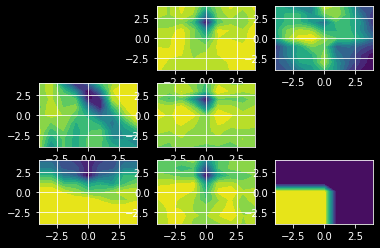

In [125]:
h, w, _ = i1.shape
cnt = 1
# src1, src2 = cv2.cvtColor(i1, cv2.COLOR_RGB2GRAY), cv2.cvtColor(i5, cv2.COLOR_RGB2GRAY)
src1, src2 = cv2.Canny(i1, 0, 255), cv2.Canny(i7, 0, 255)
#gray = cv2.cvtColor(i1, cv2.COLOR_RGB2GRAY)
edge = 100
r = 3

for j in range(w//(r*2),w,w//r):
    for i in range(h//(r*2),h,h//r):
        pi1,pi2 = src1[i:i+edge, j:j+edge,],  src2[i:i+edge, j:j+edge,]
        
        k = parallelMovement(pi1,pi2,r)
        cnt += 1
        print(k, pi1.shape,pi2.shape,r)

## 그냥: 3.5초
# canny: 2.1초
# 크기+줄이기 0.7초
# 회색+크기 줄이기: 1.9

# 목표 1/60=0.01=10ms 

In [126]:
# gray = cv2.cvtColor(i1, cv2.COLOR_RGB2GRAY)
# sobel = cv2.Sobel(gray, cv2.CV_8U, 1, 0, 3)
# laplacian = cv2.Laplacian(gray, cv2.CV_8U, ksize=3)
src = i1
w,h,c = src.shape
f = 4
# dst = cv2.pyrUp(src, dstsize=(w // f, h // f), borderType=cv2.BORDER_DEFAULT)
# dst = cv2.pyrDown(cv2.pyrDown(src))
# cv2.imshow('dst',src)
canny = cv2.Canny(src, 0, 255)
cv2.imshow("canny", canny)
cv2.waitKey()


-1

In [6]:

src2 = canny.copy()
h,w = src2.shape
for i in range(w//6,w,w//3):
    for j in range(h//6,h,h//3):
        src2 = cv2.rectangle(src2, (i, j), (i+edge, j+edge), (255, 0, 0), 5, cv2.LINE_8)
# plt.plot(gray)
cv2.imshow("src2", cv2.pyrDown(cv2.pyrDown(src2)))
cv2.waitKey()

-1

[[0.1311 0.1373 0.1449 0.1543 0.1689 0.1553 0.1505 0.1445 0.1443]
 [0.1381 0.1459 0.1535 0.162  0.1772 0.1641 0.1574 0.1548 0.1543]
 [0.147  0.1545 0.1617 0.1713 0.186  0.1749 0.1678 0.1644 0.1646]
 [0.1568 0.1648 0.1715 0.1811 0.1937 0.1864 0.1798 0.1739 0.1751]
 [0.1649 0.1729 0.1796 0.1918 0.1985 0.1972 0.1898 0.1829 0.1849]
 [0.1545 0.1628 0.1718 0.1841 0.1852 0.1921 0.1815 0.1746 0.176 ]
 [0.1449 0.1513 0.161  0.17   0.1662 0.1819 0.1699 0.1663 0.1655]
 [0.1352 0.1424 0.1538 0.1603 0.1577 0.1715 0.1599 0.1573 0.1548]
 [0.1343 0.141  0.1522 0.1606 0.1674 0.1709 0.1604 0.1565 0.153 ]]
(0.8064016686569291, 0.12727997013171616) (100, 100) (100, 100) 3
[[0.1777 0.1821 0.1925 0.2045 0.2188 0.209  0.2074 0.2029 0.2026]
 [0.1895 0.1956 0.2053 0.2148 0.2272 0.2206 0.2158 0.2132 0.2105]
 [0.1981 0.2057 0.2151 0.2228 0.2361 0.2331 0.2267 0.2216 0.2208]
 [0.2045 0.2148 0.2271 0.2267 0.2399 0.2426 0.2357 0.2281 0.2286]
 [0.2116 0.2229 0.2365 0.2332 0.2372 0.25   0.2421 0.2322 0.2364]
 [0.1993 

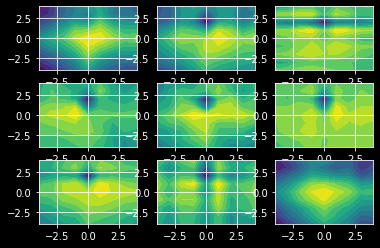

In [127]:

# src2 = canny.copy()
# src1, src2 = cv2.cvtColor(i1, cv2.COLOR_RGB2GRAY), cv2.cvtColor(i5, cv2.COLOR_RGB2GRAY)
src1, src2 = cv2.Canny(i1, 0, 255), cv2.Canny(i7, 0, 255)
h,w = src2.shape
out = []
p_out = []
n = 9
cnt = 1
for i in range(0, w-edge, edge):
    for j in range(0,h-edge,edge):
        subsrc =  src2[j:j+edge,i:i+edge]
        s =  sum(sum(subsrc))
        # print('subsrc',i,j,subsrc.shape,s)
        p_out.append((i,j,s))
        out.append(s)

    
md = sorted(out)[len(out)//2]#sum(out)/len(out)
p_out = [*filter(lambda s:s[2]>md,p_out)]
rp = len(p_out)//n

for i,j,s in p_out:
    src2 = cv2.rectangle(src2, (i, j), (i+edge, j+edge), (130, 0, 0), 5, cv2.LINE_8)


for od in range(0,len(p_out)-rp+1, rp):
    (i,j,s) = p_out[randint(0,rp-1)+od]
    src2 = cv2.rectangle(src2, (i, j), (i+edge, j+edge), (255, 0, 0), 5, cv2.LINE_8)

    pi1,pi2 = src1[j:j+edge,i:i+edge],  src2[j:j+edge,i:i+edge]
        
    k = parallelMovement(pi1,pi2,r)
    cnt += 1
    print(k, pi1.shape,pi2.shape,r)



# plt.plot(gray)
# cv2.imshow("src2", cv2.pyrDown(cv2.pyrDown(src2)))
# cv2.waitKey()

In [128]:
cv2.imshow("src2", cv2.pyrDown(cv2.pyrDown(src2)))
cv2.waitKey()

-1

In [150]:
sc = numpy.array([
[0.1311, 0.1373, 0.1449, 0.1543, 0.1689, 0.1553, 0.1505, 0.1445, 0.1443,],
[0.1381, 0.1459, 0.1535, 0.162 , 0.1772, 0.1641, 0.1574, 0.1548, 0.1543,],
[0.147 , 0.1545, 0.1617, 0.1713, 0.186 , 0.1749, 0.1678, 0.1644, 0.1646,],
[0.1568, 0.1648, 0.1715, 0.1811, 0.1937, 0.1864, 0.1798, 0.1739, 0.1751,],
[0.1649, 0.1729, 0.1796, 0.1918, 0.1985, 0.1972, 0.1898, 0.1829, 0.1849,],
[0.1545, 0.1628, 0.1718, 0.1841, 0.1852, 0.1921, 0.1815, 0.1746, 0.176 ,],
[0.1449, 0.1513, 0.161 , 0.17  , 0.1662, 0.1819, 0.1699, 0.1663, 0.1655,],
[0.1352, 0.1424, 0.1538, 0.1603, 0.1577, 0.1715, 0.1599, 0.1573, 0.1548,],
[0.1343, 0.141 , 0.1522, 0.1606, 0.1674, 0.1709, 0.1604, 0.1565, 0.153 ,],])

sc = numpy.array([
[0.1777, 0.1821, 0.1925, 0.2045, 0.2188, 0.209,  0.2074, 0.2029, 0.2026,],
[0.1895, 0.1956, 0.2053, 0.2148, 0.2272, 0.2206, 0.2158, 0.2132, 0.2105,],
[0.1981, 0.2057, 0.2151, 0.2228, 0.2361, 0.2331, 0.2267, 0.2216, 0.2208,],
[0.2045, 0.2148, 0.2271, 0.2267, 0.2399, 0.2426, 0.2357, 0.2281, 0.2286,],
[0.2116, 0.2229, 0.2365, 0.2332, 0.2372, 0.25,   0.2421, 0.2322, 0.2364,],
[0.1993, 0.2106, 0.227,  0.2233, 0.2105, 0.2419, 0.2332, 0.2173, 0.2265,],
[0.1845, 0.1914, 0.2064, 0.1991, 0.157,  0.2106, 0.2125, 0.1972, 0.2079,],
[0.1825, 0.1853, 0.2032, 0.2078, 0.1778, 0.2031, 0.2053, 0.1914, 0.1975,],
[0.1825, 0.1849, 0.2049, 0.2117, 0.2013, 0.2043, 0.209,  0.1954, 0.1991,],])

In [148]:
px, py = 4,4
pxl, pyl = (0,8), (0,8)
value = sc[px,py]
while True:
    if px<=pxl[0] or px>=pxl[1] or py<=pyl[0] or py>=pyl[1]:
        print('테두리 닿음. 종료')
        break
    u,d,l,r = value-sc[px,py+1], value-sc[px,py-1], value-sc[px+1,py], value-sc[px-1,py]
    m = max(u,d,l,r)
    print(f"id:({px},{py}),  {value},{u:.4f},{d:.4f},{l:.4f},{r:.4f}")
    if m<0:
        break
    elif m==u: py+=1
    elif m==d: py-=1
    elif m==l: px+=1
    elif m==r: px-=1




id:(4,4),  0.1985,0.0013,0.0067,0.0133,0.0048
id:(5,4),  0.1985,0.0064,0.0144,0.0323,0.0000
id:(6,4),  0.1985,0.0166,0.0285,0.0408,0.0133
id:(7,4),  0.1985,0.0270,0.0382,0.0311,0.0323
id:(7,3),  0.1985,0.0408,0.0447,0.0379,0.0285
id:(7,2),  0.1985,0.0382,0.0561,0.0463,0.0375
id:(7,1),  0.1985,0.0447,0.0633,0.0575,0.0472
테두리 닿음. 종료


In [139]:
sc

[[0.1311, 0.1373, 0.1449, 0.1543, 0.1689, 0.1553, 0.1505, 0.1445, 0.1443],
 [0.1381, 0.1459, 0.1535, 0.162, 0.1772, 0.1641, 0.1574, 0.1548, 0.1543],
 [0.147, 0.1545, 0.1617, 0.1713, 0.186, 0.1749, 0.1678, 0.1644, 0.1646],
 [0.1568, 0.1648, 0.1715, 0.1811, 0.1937, 0.1864, 0.1798, 0.1739, 0.1751],
 [0.1649, 0.1729, 0.1796, 0.1918, 0.1985, 0.1972, 0.1898, 0.1829, 0.1849],
 [0.1545, 0.1628, 0.1718, 0.1841, 0.1852, 0.1921, 0.1815, 0.1746, 0.176],
 [0.1449, 0.1513, 0.161, 0.17, 0.1662, 0.1819, 0.1699, 0.1663, 0.1655],
 [0.1352, 0.1424, 0.1538, 0.1603, 0.1577, 0.1715, 0.1599, 0.1573, 0.1548],
 [0.1343, 0.141, 0.1522, 0.1606, 0.1674, 0.1709, 0.1604, 0.1565, 0.153]]

In [ ]:
k= numpy.array(range(3**2)).reshape((3,3))
k

array([[0, 1, 2],
       [3, 4, 5],
       [6, 7, 8]])